<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221017%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
!pip install konlpy # korea natural language

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import konlpy
from nltk.tokenize import word_tokenize # '를 하나의 토큰으로 
from nltk.tokenize import WordPunctTokenizer # '를 각각의 토큰으로 
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [4]:
text = "I'm a boy. You are a girl. He's a student."

In [5]:
print(word_tokenize(text))

['I', "'m", 'a', 'boy', '.', 'You', 'are', 'a', 'girl', '.', 'He', "'s", 'a', 'student', '.']


In [6]:
tokens = text.split(' ')
print(tokens)

["I'm", 'a', 'boy.', 'You', 'are', 'a', 'girl.', "He's", 'a', 'student.']


In [7]:
# 여러 단어로 split 하기
import re
print(re.split(' |,.|', text))

['', 'I', "'", 'm', '', 'a', '', 'b', 'o', 'y', '.', '', 'Y', 'o', 'u', '', 'a', 'r', 'e', '', 'a', '', 'g', 'i', 'r', 'l', '.', '', 'H', 'e', "'", 's', '', 'a', '', 's', 't', 'u', 'd', 'e', 'n', 't', '.', '']


In [8]:
wpt = WordPunctTokenizer()
print(wpt.tokenize(text))

['I', "'", 'm', 'a', 'boy', '.', 'You', 'are', 'a', 'girl', '.', 'He', "'", 's', 'a', 'student', '.']


In [9]:
print(text_to_word_sequence(text)) # tokens = text.split(' ') 와 결과가 비슷하나 대문자를 소문자로 만듬

["i'm", 'a', 'boy', 'you', 'are', 'a', 'girl', "he's", 'a', 'student']


In [10]:
text2 = "He is a Doc. Kim. I'm a Gen. Jang. I'm O.K.."
print(word_tokenize(text2)) # " ' " 살리지 않음. 문자열 사이에 .은하나로 인식
print(wpt.tokenize(text2)) # " ' " 도 살림 
print(text_to_word_sequence(text2)) # 공백기준으로 토큰화함. 대문자 -> 소문자. ' . ' 을 모두 배제함
print(text2.split(' ')) # .도 다 포함

['He', 'is', 'a', 'Doc', '.', 'Kim', '.', 'I', "'m", 'a', 'Gen.', 'Jang', '.', 'I', "'m", 'O.K', '..']
['He', 'is', 'a', 'Doc', '.', 'Kim', '.', 'I', "'", 'm', 'a', 'Gen', '.', 'Jang', '.', 'I', "'", 'm', 'O', '.', 'K', '..']
['he', 'is', 'a', 'doc', 'kim', "i'm", 'a', 'gen', 'jang', "i'm", 'o', 'k']
['He', 'is', 'a', 'Doc.', 'Kim.', "I'm", 'a', 'Gen.', 'Jang.', "I'm", 'O.K..']


In [11]:
text3 = "나는 집에 갑니다. 우리는 집으로 갑니다."
print(word_tokenize(text3)) # " ' " 살리지 않음. 문자열 사이에 .은하나로 인식
print(wpt.tokenize(text3)) # " ' " 도 살림 
print(text_to_word_sequence(text3)) 
print(text3.replace('.','').split(' ')) 

['나는', '집에', '갑니다', '.', '우리는', '집으로', '갑니다', '.']
['나는', '집에', '갑니다', '.', '우리는', '집으로', '갑니다', '.']
['나는', '집에', '갑니다', '우리는', '집으로', '갑니다']
['나는', '집에', '갑니다', '우리는', '집으로', '갑니다']


In [12]:
# 한글 텍스트 분석 라이브러리
from konlpy.tag import Hannanum
hannanum = Hannanum() 
print(hannanum.morphs(text3)) #텍스트에서 형태소를 반환한다
print(hannanum.nouns(text3)) # 텍스트에서 명사를 반환한다
print(hannanum.pos(text3))  #텍스트에서 품사 정보를 부착하여 반환한다 N : 명사, J,S : 보조, P : 동사 
print(hannanum.analyze(text3)) #이 분석기는 각 토론에 대해 다양한 형태로 반환하다. 해당 분석기는 사전검색(차트), 분류되지않은 용어 두 부분으로 분할 구성되어있다.

['나', '는', '집', '에', '가', 'ㅂ니다', '.', '우리', '는', '집', '으로', '가', 'ㅂ니다', '.']
['나', '집', '우리', '집']
[('나', 'N'), ('는', 'J'), ('집', 'N'), ('에', 'J'), ('가', 'P'), ('ㅂ니다', 'E'), ('.', 'S'), ('우리', 'N'), ('는', 'J'), ('집', 'N'), ('으로', 'J'), ('가', 'P'), ('ㅂ니다', 'E'), ('.', 'S')]
[[[('나', 'ncn'), ('는', 'jxc')], [('나', 'npp'), ('는', 'jxc')], [('나', 'pvg'), ('는', 'etm')], [('나', 'px'), ('는', 'etm')], [('나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')], [('나', 'pvg'), ('아', 'ef'), ('는', 'etm')], [('나', 'px'), ('아', 'ecs'), ('는', 'jxc')], [('나', 'px'), ('아', 'ef'), ('는', 'etm')], [('날', 'pvg'), ('는', 'etm')]], [[('집', 'ncn'), ('에', 'jca')]], [[('갈', 'pvg'), ('ㅂ니다', 'ef')], [('가', 'pvg'), ('ㅂ니다', 'ef')], [('가', 'px'), ('ㅂ니다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]], [], [[('우리', 'npp'), ('는', 'jxc')], [('우리', 'pvg'), ('는', 'etm')]], [[('집', 'ncn'), ('으로', 'jca')]], [[('갈', 'pvg'), ('ㅂ니다', 'ef')], [('가', 'pvg'), ('ㅂ니다', 'ef')], [('가', 'px'), ('ㅂ니다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]]]


In [13]:
client_id = 'eogY5qyYS6W93p8c8D7K' #자신이 발급받은 client id 
client_secret = '1KG3FYRLaj' #자신이 발급받은 client secret

In [14]:
site_url = 'https://openapi.naver.com/v1/search/news.json' #json형식부터

In [15]:
import urllib.request
import json

In [16]:
text = input("검색 질의 : ")
query = urllib.parse.quote(text)
print(query)

검색 질의 : 카카오
%EC%B9%B4%EC%B9%B4%EC%98%A4


In [17]:
query_str = site_url + "?" + "query=" + query
print(query_str)

https://openapi.naver.com/v1/search/news.json?query=%EC%B9%B4%EC%B9%B4%EC%98%A4


In [18]:
#헤더 정보를 요구하지 않을 때 웹 요청
# res = urllib.request.urlopen('http://google.com')
# print(res.read())

In [19]:
request = urllib.request.Request(query_str) #웹 요청 개체 생성
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request) #웹 서버에 요청(웹 크롤링)

In [20]:
if response.getcode() == 200:
  print("요청 성근")
else:
  print("요청 실패")

요청 성근


In [21]:
data = response.read() # 바이너리 데이터로 읽어오기
print(data)

b'{\n\t"lastBuildDate":"Mon, 17 Oct 2022 14:50:56 +0900",\n\t"total":2623169,\n\t"start":1,\n\t"display":10,\n\t"items":[\n\t\t{\n\t\t\t"title":"&apos;<b>\xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4<\\/b> \xeb\xa8\xb9\xed\x86\xb5 \xec\x82\xac\xed\x83\x9c&apos; \xec\xb5\x9c\xed\x83\x9c\xec\x9b\x90\xc2\xb7\xea\xb9\x80\xeb\xb2\x94\xec\x88\x98 \xec\xa7\x81\xec\xa0\x91 \xec\x9e\x85\xec\x97\xb0\xeb\x8b\xa4\xe2\x80\xa6\xea\xb5\xad\xea\xb0\x90, \xec\xa6\x9d\xec\x9d\xb8 \xec\xb1\x84\xed\x83\x9d",\n\t\t\t"originallink":"http:\\/\\/www.opinionnews.co.kr\\/news\\/articleView.html?idxno=74950",\n\t\t\t"link":"http:\\/\\/www.opinionnews.co.kr\\/news\\/articleView.html?idxno=74950",\n\t\t\t"description":"<b>\xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4<\\/b> \xeb\xa8\xb9\xed\x86\xb5 \xec\x82\xac\xed\x83\x9c \xed\x9b\x84\xed\x8f\xad\xed\x92\x8d\xec\x9d\xb4 \xea\xb1\xb0\xec\x84\xbc \xea\xb0\x80\xec\x9a\xb4\xeb\x8d\xb0 17\xec\x9d\xbc \xea\xb5\xad\xed\x9a\x8c\xeb\x8a\x94 \xea\xb9\x80\xeb\xb2\x94\xec\x88\x98 <b>\xec\xb9\x

In [22]:
dec_data = data.decode('utf-8')
print(dec_data)

{
	"lastBuildDate":"Mon, 17 Oct 2022 14:50:56 +0900",
	"total":2623169,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"&apos;<b>카카오<\/b> 먹통 사태&apos; 최태원·김범수 직접 입연다…국감, 증인 채택",
			"originallink":"http:\/\/www.opinionnews.co.kr\/news\/articleView.html?idxno=74950",
			"link":"http:\/\/www.opinionnews.co.kr\/news\/articleView.html?idxno=74950",
			"description":"<b>카카오<\/b> 먹통 사태 후폭풍이 거센 가운데 17일 국회는 김범수 <b>카카오<\/b> 의장, 최태원 SK그룹 회장, 이해진 네이버글로벌투자책임(왼쪽부터)을 국정감사 증인으로 채택했다. 사진=연합뉴스  주말이었던 지난 15일 터진 &apos;<b>카카오<\/b>... ",
			"pubDate":"Mon, 17 Oct 2022 14:48:00 +0900"
		},
		{
			"title":"넵튠, NH투자증권과 금융서비스 메타버스 구축 나서",
			"originallink":"http:\/\/www.aitimes.com\/news\/articleView.html?idxno=147356",
			"link":"http:\/\/www.aitimes.com\/news\/articleView.html?idxno=147356",
			"description":"컬러버스는 웹이나 앱 환경의 제약없이 이동이 가능한 플랫폼으로, <b>카카오<\/b>톡 등의 2D 서비스를 3D 메타버스 내에서 별도의 앱 설치 없이 사용할 수 있다. 금융권 기업과 협약을 맺은 것은 이번이 처음이다. NH투자증권... ",
			"pubDate":"Mon, 17 Oct 2022 14:48:00 +0900"
		},
		{
			"tit

In [23]:
jdata = json.loads(dec_data) #json데이터로 로딩
print(jdata)

{'lastBuildDate': 'Mon, 17 Oct 2022 14:50:56 +0900', 'total': 2623169, 'start': 1, 'display': 10, 'items': [{'title': '&apos;<b>카카오</b> 먹통 사태&apos; 최태원·김범수 직접 입연다…국감, 증인 채택', 'originallink': 'http://www.opinionnews.co.kr/news/articleView.html?idxno=74950', 'link': 'http://www.opinionnews.co.kr/news/articleView.html?idxno=74950', 'description': '<b>카카오</b> 먹통 사태 후폭풍이 거센 가운데 17일 국회는 김범수 <b>카카오</b> 의장, 최태원 SK그룹 회장, 이해진 네이버글로벌투자책임(왼쪽부터)을 국정감사 증인으로 채택했다. 사진=연합뉴스 \xa0주말이었던 지난 15일 터진 &apos;<b>카카오</b>... ', 'pubDate': 'Mon, 17 Oct 2022 14:48:00 +0900'}, {'title': '넵튠, NH투자증권과 금융서비스 메타버스 구축 나서', 'originallink': 'http://www.aitimes.com/news/articleView.html?idxno=147356', 'link': 'http://www.aitimes.com/news/articleView.html?idxno=147356', 'description': '컬러버스는 웹이나 앱 환경의 제약없이 이동이 가능한 플랫폼으로, <b>카카오</b>톡 등의 2D 서비스를\xa03D 메타버스 내에서 별도의 앱 설치 없이 사용할 수 있다. 금융권 기업과 협약을 맺은 것은 이번이 처음이다. NH투자증권... ', 'pubDate': 'Mon, 17 Oct 2022 14:48:00 +0900'}, {'title': '지그재그, WE THINK GREEN 기획전 진행', 'originallink': 'ht

In [24]:
no=0
for news in jdata['items']:
  no +=1
  print("=== <",no,"> ===",news['title'])
  print(news['description'])

=== < 1 > === &apos;<b>카카오</b> 먹통 사태&apos; 최태원·김범수 직접 입연다…국감, 증인 채택
<b>카카오</b> 먹통 사태 후폭풍이 거센 가운데 17일 국회는 김범수 <b>카카오</b> 의장, 최태원 SK그룹 회장, 이해진 네이버글로벌투자책임(왼쪽부터)을 국정감사 증인으로 채택했다. 사진=연합뉴스  주말이었던 지난 15일 터진 &apos;<b>카카오</b>... 
=== < 2 > === 넵튠, NH투자증권과 금융서비스 메타버스 구축 나서
컬러버스는 웹이나 앱 환경의 제약없이 이동이 가능한 플랫폼으로, <b>카카오</b>톡 등의 2D 서비스를 3D 메타버스 내에서 별도의 앱 설치 없이 사용할 수 있다. 금융권 기업과 협약을 맺은 것은 이번이 처음이다. NH투자증권... 
=== < 3 > === 지그재그, WE THINK GREEN 기획전 진행
<b>카카오</b>스타일의 지그재그가 일상 속 친환경 실천 장려 및 친환경 상품 판매 활성화를 위한 지원에 나선다.... <b>카카오</b>스타일 관계자는 &quot;친환경 실천을 위해 일상 속 작은 습관부터 바꿔보자는 취지로 대표적인 주방... 
=== < 4 > === <b>카카오</b>뱅크, <b>카카오</b> 연계 서비스 정상화
<b>카카오</b>뱅크는 <b>카카오</b>와 연계된 서비스를 포함해 <b>카카오</b>뱅크가 제공하는 모든 서비스가 정상화됐다고 17일 밝혔다. <b>카카오</b>뱅크에 따르면 이날 12시 09분 이후 <b>카카오</b>와 연계된 서비스들은 모두 정상화돼 원활한 이용이... 
=== < 5 > === &apos;데이터센터 화재&apos; 카뱅…인터넷은행, 데이터 관리 리스크 불똥
야기한 <b>카카오</b> 그룹주가 고전하고 있는 가운데 데이터센터를 따로 운영해 피해 규모가 상대적으로 적었던 인터넷전문은행 <b>카카오</b>뱅크 역시 역풍에 휩싸인 모습이다. 특히 모든 은행 업무가 비대면으로 처리되는... 
=== < 6 > === <b>카카오</b>뱅크 &q

In [25]:
sample_text = '법률신문은 사회관계망분석(SNA) 프로그램인 &apos;<b>파이썬</b>(PYTHON)&apos;을 활용해 2018년 3월부터 2022년 3월까지 법원을 떠난 대법원 재판연구관들의 현재 직장과 로펌, 대법원과의 관계성을 국내 언론 최초로 분석했다. 그 결과 이... '

In [26]:
# 쓸모없는 태그를 제거하여 텍스트만 추출하는 함수 생성
def remove_tag(text):
  while True:
    b_t = text.find('<')
    if b_t == -1:
      break
    e_t = text.find('>')
    if b_t < e_t:
      text = text[:b_t] + text[e_t+1:]
    else:
      break
  return text

In [27]:
print(remove_tag("<abc>안녕</abc><html>음냐뤼라뇨강사님</html>")) #체크

안녕음냐뤼라뇨강사님


In [28]:
# &로 시작하고 ;로 끝나는 특수문자를 제거하여 텍스트만 추출하는 함수 생성
def remove_wc(text):
  while True:
    b_t = text.find('&')
    if b_t == -1:
      break
    e_t = text.find(';')
    if b_t < e_t:
      text = text[:b_t] + text[e_t+1:]
    else:
      break
  return text

In [29]:
# 위에 두 함수를 합쳐주는 함수
def remove_html(text):
  text = remove_tag(text) # 태그 제거
  return remove_wc(text) # 특수문자 제거

In [30]:
print(remove_html(sample_text)) #check

법률신문은 사회관계망분석(SNA) 프로그램인 파이썬(PYTHON)을 활용해 2018년 3월부터 2022년 3월까지 법원을 떠난 대법원 재판연구관들의 현재 직장과 로펌, 대법원과의 관계성을 국내 언론 최초로 분석했다. 그 결과 이... 


In [31]:
# 위 함수들을 이용하여 텍스트만 추출하기
no = 0
for news in jdata['items']:
  no += 1
  print("=== <",no,"> ===", remove_html(news['title']))
  print(remove_html(news['description']))

=== < 1 > === 카카오 먹통 사태 최태원·김범수 직접 입연다…국감, 증인 채택
카카오 먹통 사태 후폭풍이 거센 가운데 17일 국회는 김범수 카카오 의장, 최태원 SK그룹 회장, 이해진 네이버글로벌투자책임(왼쪽부터)을 국정감사 증인으로 채택했다. 사진=연합뉴스  주말이었던 지난 15일 터진 카카오... 
=== < 2 > === 넵튠, NH투자증권과 금융서비스 메타버스 구축 나서
컬러버스는 웹이나 앱 환경의 제약없이 이동이 가능한 플랫폼으로, 카카오톡 등의 2D 서비스를 3D 메타버스 내에서 별도의 앱 설치 없이 사용할 수 있다. 금융권 기업과 협약을 맺은 것은 이번이 처음이다. NH투자증권... 
=== < 3 > === 지그재그, WE THINK GREEN 기획전 진행
카카오스타일의 지그재그가 일상 속 친환경 실천 장려 및 친환경 상품 판매 활성화를 위한 지원에 나선다.... 카카오스타일 관계자는 친환경 실천을 위해 일상 속 작은 습관부터 바꿔보자는 취지로 대표적인 주방... 
=== < 4 > === 카카오뱅크, 카카오 연계 서비스 정상화
카카오뱅크는 카카오와 연계된 서비스를 포함해 카카오뱅크가 제공하는 모든 서비스가 정상화됐다고 17일 밝혔다. 카카오뱅크에 따르면 이날 12시 09분 이후 카카오와 연계된 서비스들은 모두 정상화돼 원활한 이용이... 
=== < 5 > === 데이터센터 화재 카뱅…인터넷은행, 데이터 관리 리스크 불똥
야기한 카카오 그룹주가 고전하고 있는 가운데 데이터센터를 따로 운영해 피해 규모가 상대적으로 적었던 인터넷전문은행 카카오뱅크 역시 역풍에 휩싸인 모습이다. 특히 모든 은행 업무가 비대면으로 처리되는... 
=== < 6 > === 카카오뱅크 카카오 연계 서비스 모두 정상화
17일 낮 12시 9분 공지 [시장경제=오창균 기자] 사진=카카오뱅크 제공 카카오뱅크는 데이터센터 화재로 인해 발생한 서비스 장애와 관련해 17일 낮 12시 9분을 기준으로 모든 서비스를 정상화했다고 밝혔다. 앞서 지난 15일... 
=== < 7 

In [32]:
ls1 = ['a','b','c']
ls2 = ['a','d','b']
ls1+ls2

['a', 'b', 'c', 'a', 'd', 'b']

In [33]:
ls = []
no=0
for news in jdata['items']:
  no +=1
  t_ls = remove_html(news['title']).split(' ')
  d_ls = remove_html(news['description']).split(' ')
  ls += t_ls
  ls += d_ls
  # print("=== <",no,"> ===",remove_html(news['title']))
  # print(news['description'])
print(ls)

['카카오', '먹통', '사태', '최태원·김범수', '직접', '입연다…국감,', '증인', '채택', '카카오', '먹통', '사태', '후폭풍이', '거센', '가운데', '17일', '국회는', '김범수', '카카오', '의장,', '최태원', 'SK그룹', '회장,', '이해진', '네이버글로벌투자책임(왼쪽부터)을', '국정감사', '증인으로', '채택했다.', '사진=연합뉴스', '\xa0주말이었던', '지난', '15일', '터진', '카카오...', '', '넵튠,', 'NH투자증권과', '금융서비스', '메타버스', '구축', '나서', '컬러버스는', '웹이나', '앱', '환경의', '제약없이', '이동이', '가능한', '플랫폼으로,', '카카오톡', '등의', '2D', '서비스를\xa03D', '메타버스', '내에서', '별도의', '앱', '설치', '없이', '사용할', '수', '있다.', '금융권', '기업과', '협약을', '맺은', '것은', '이번이', '처음이다.', 'NH투자증권...', '', '지그재그,', 'WE', 'THINK', 'GREEN', '기획전', '진행', '카카오스타일의', '지그재그가', '일상', '속', '친환경', '실천', '장려', '및', '친환경', '상품', '판매', '활성화를', '위한', '지원에', '나선다....', '카카오스타일', '관계자는', '친환경', '실천을', '위해', '일상', '속', '작은', '습관부터', '바꿔보자는', '취지로', '대표적인', '주방...', '', '카카오뱅크,', '카카오', '연계', '서비스', '정상화', '카카오뱅크는', '카카오와', '연계된', '서비스를', '포함해', '카카오뱅크가', '제공하는', '모든', '서비스가', '정상화됐다고', '17일', '밝혔다.', '카카오뱅크에', '따르면', '이날', '12시', '09분', '이후', '카카오와', '연계된', '서비스들은', '모두', '정상화돼', '

In [ ]:
import pandas as pd
s = pd.Series(ls)
vc = s.value_counts()
for i,v in zip(vc.index,vc.values):
  print(i,":",v)

In [ ]:
re = s[s!='']
vc = re.value_counts()
for i,v in zip(vc.index,vc.values):
  print(i,":",v)

In [36]:
# 심볼을 공백으로 바꾸기
import re
def remove_symbol(text):
  # return re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]"," ",text)
  return re.sub(r"[^ㄱ-힣0-9a-zA-Z\s]"," ",text)

In [37]:
# 위에 두 함수를 합쳐주는 함수
def remove_html(text):
  text = remove_tag(text) # 태그 제거
  text = remove_wc(text) # 특수문자 제거
  return remove_symbol(text) #영문,한글,숫자 문자를 제외한 기호 제거

In [38]:
ls = []
for news in jdata['items']:
  no += 1
  t_ls = remove_html(news['title']).split(' ')
  d_ls = remove_html(news['description']).split(' ')
  ls += t_ls
  ls += d_ls
print(ls)

['카카오', '먹통', '사태', '최태원', '김범수', '직접', '입연다', '국감', '', '증인', '채택', '카카오', '먹통', '사태', '후폭풍이', '거센', '가운데', '17일', '국회는', '김범수', '카카오', '의장', '', '최태원', 'SK그룹', '회장', '', '이해진', '네이버글로벌투자책임', '왼쪽부터', '을', '국정감사', '증인으로', '채택했다', '', '사진', '연합뉴스', '\xa0주말이었던', '지난', '15일', '터진', '카카오', '', '', '', '', '넵튠', '', 'NH투자증권과', '금융서비스', '메타버스', '구축', '나서', '컬러버스는', '웹이나', '앱', '환경의', '제약없이', '이동이', '가능한', '플랫폼으로', '', '카카오톡', '등의', '2D', '서비스를\xa03D', '메타버스', '내에서', '별도의', '앱', '설치', '없이', '사용할', '수', '있다', '', '금융권', '기업과', '협약을', '맺은', '것은', '이번이', '처음이다', '', 'NH투자증권', '', '', '', '', '지그재그', '', 'WE', 'THINK', 'GREEN', '기획전', '진행', '카카오스타일의', '지그재그가', '일상', '속', '친환경', '실천', '장려', '및', '친환경', '상품', '판매', '활성화를', '위한', '지원에', '나선다', '', '', '', '', '카카오스타일', '관계자는', '친환경', '실천을', '위해', '일상', '속', '작은', '습관부터', '바꿔보자는', '취지로', '대표적인', '주방', '', '', '', '', '카카오뱅크', '', '카카오', '연계', '서비스', '정상화', '카카오뱅크는', '카카오와', '연계된', '서비스를', '포함해', '카카오뱅크가', '제공하는', '모든', '서비스가', '정상화됐다고', '17일', '밝혔다',

In [39]:
temp = "adfa.eaf#zicdk!'ciek(ed)ald음냐뤼가뭐죠강사님!"
print(remove_symbol(temp))

adfa eaf zicdk  ciek ed ald음냐뤼가뭐죠강사님 


In [ ]:
re = s[s!='']
vc = re.value_counts()
for i,v in zip(vc.index,vc.values):
  print(i,":",v)

In [41]:
def news_count(query): #질의에 해당하는 전체 뉴스 개수 구하는 함수
  query = urllib.parse.quote(query) #utf-8로 쿼리를 인코딩
  site_url = "https://openapi.naver.com/v1/search/news.json"
  query_str = site_url+"?query="+query #쿼리문자열
  request = urllib.request.Request(query_str) #웹 요청 개체 생성
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request) #웹 서버에 요청(웹 크롤링)
  if response.getcode()!=200:
    return 0
  data = response.read() #응답결과를 binary 데이터로 읽기
  dec_data = data.decode('utf-8')
  j_data = json.loads(dec_data)
  return int(j_data['total'])

In [42]:
text = input("질의 : ")
print(news_count(text))

질의 : 카카오
2623177


In [43]:
class MyNews:
  def __init__(self,news):
    self.title = news['title']
    self.description = news['description']
    self.link = news['link']

In [44]:
def get_news(query): #질의에 해당하는 뉴스를 얻어오는 함수
  total = news_count(query) #전체 요소 개수를 얻어온다.
  rcnt = 0
  start = 0
  display = 100
  re = [] #반환할 뉴스 컬렉션
  query = urllib.parse.quote(query) #urf-8로 쿼리를 인코딩
  while (rcnt<total)and(start<100):
    start += 1
    site_url = 'https://openapi.naver.com/v1/search/news.json'
    query_str = site_url+"?query="+query+"&start="+str(start)+"&display="+str(display) #쿼리 문자열
    print(query_str)
    request = urllib.request.Request(query_str) #웹 요청 개체 생성
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request) #웹 서버에 요청(웹 크롤링)
    if response.getcode()!=200:
      return re
    data = response.read() #응답 결과를 binary 데이터로 읽기
    dec_data = data.decode('utf-8')
    j_data = json.loads(dec_data) # 디코딩한 결과 json데이터로 바꾸기
    for news in j_data['items']:
      re.append(MyNews(news))
    rcnt +=len(j_data['items'])
  return re

In [45]:
text = input("질의 : ")
for news in get_news(text):
  print(news.title)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
동아대 음악학과-사하경찰서 &apos;학교폭력예방 캠페인송&apos; 제작
공정위, 먹튀 명품 쇼핑몰 &apos;사크라스트라다&apos; 폐쇄 조치
소공연, 소상공인 <b>카카오</b> 피해 접수 센터 운영
[<b>카카오</b> 대란] &quot;민간 서비스지만 국민 생활 기반&quot; 인터넷 기업 재난대응 법안...
배터리에서 스파크…<b>카카오</b> 데이터센터 화재 현장 CCTV 포착
금감원 &quot;주식거래 전산장애 의심되면 증빙 확보해야&quot;
현대차·기아, <b>카카오</b> 화재에 불똥… &apos;AI 비서&apos; 멈춰 이용자 불편
&apos;<b>카카오</b> 먹통&apos; 피해자들, 집단소송 움직임
장사 공친 택시기사들…<b>카카오</b> &apos;먹통&apos; 보상 어디까지?
금감원 &quot;<b>카카오</b> 계열사 금융거래 전산처리 문제없어&quot;…피해 접수 적시 보상 여...
[<b>카카오</b> 재난] 은행은 멀쩡한 이유...데이터센터 2~3개·재난훈련 실시
‘<b>카카오</b> 먹통’으로 백신 예약도 장애… “오늘 새벽 완전 정상화”
김범수.최태원.이해진, <b>카카오</b> 먹통사태에 국감 증인대 오른다
전기실 배터리서 불꽃 튀었다...’<b>카카오</b> 대란’ 부른 화재, CCTV 포착
여야, 민간 데이터센터 국가재난관리시설 지정 추진
&apos;국교위 국감&apos; 이배용 위원장 역사관 도마에 올라
김동연, <b>카카오</b> 사태에 &quot;통신3사 데이터센터 소방특별조사 추진&quot;
<b>카카오</b>뱅크 &quot;<b>카카오</b> 연계 서비스 모두 정상화…시스템 문제 없어&quot;
농어촌공사, 극심한 가뭄에도 전남 농업용수 91만 톤 염가에 골프장에 공급
24일 &apos;<b>카카오</b> 국감&apos;되나…정무위, 카뱅·페이·두나무 대표 증인 채택
과방위, &apos;<b>카카오</b> 오너&apos; 김범수, 국감 

# 자연어 연구 관련 라이브러리

In [46]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
text = "I'm a boy. You are a girl. He's a student."
print(nltk.tokenize.word_tokenize(text))
print(word_tokenize(text))
print(WordPunctTokenizer().tokenize(text))

['I', "'m", 'a', 'boy', '.', 'You', 'are', 'a', 'girl', '.', 'He', "'s", 'a', 'student', '.']
['I', "'m", 'a', 'boy', '.', 'You', 'are', 'a', 'girl', '.', 'He', "'s", 'a', 'student', '.']
['I', "'", 'm', 'a', 'boy', '.', 'You', 'are', 'a', 'girl', '.', 'He', "'", 's', 'a', 'student', '.']


In [47]:
text = "I'm a <br>boy</br>. You are a &apos;girl&apos;. He's a student(학생)."
print(nltk.tokenize.word_tokenize(text))
print(word_tokenize(text))
print(WordPunctTokenizer().tokenize(text))

['I', "'m", 'a', '<', 'br', '>', 'boy', '<', '/br', '>', '.', 'You', 'are', 'a', '&', 'apos', ';', 'girl', '&', 'apos', ';', '.', 'He', "'s", 'a', 'student', '(', '학생', ')', '.']
['I', "'m", 'a', '<', 'br', '>', 'boy', '<', '/br', '>', '.', 'You', 'are', 'a', '&', 'apos', ';', 'girl', '&', 'apos', ';', '.', 'He', "'s", 'a', 'student', '(', '학생', ')', '.']
['I', "'", 'm', 'a', '<', 'br', '>', 'boy', '</', 'br', '>.', 'You', 'are', 'a', '&', 'apos', ';', 'girl', '&', 'apos', ';.', 'He', "'", 's', 'a', 'student', '(', '학생', ').']


In [48]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence(text))

["i'm", 'a', 'br', 'boy', 'br', 'you', 'are', 'a', 'apos', 'girl', 'apos', "he's", 'a', 'student', '학생']


In [51]:
text2 = "나는 집으로 갑니다. 우리는 집으로 갑니다."
print(word_tokenize(text2))
# print(tkzer.tokenize(text2))
print(text_to_word_sequence(text2))
han = Hannanum()
print(han.morphs(text2))

['나는', '집으로', '갑니다', '.', '우리는', '집으로', '갑니다', '.']
['나는', '집으로', '갑니다', '우리는', '집으로', '갑니다']
['나', '는', '집', '으로', '가', 'ㅂ니다', '.', '우리', '는', '집', '으로', '가', 'ㅂ니다', '.']


In [52]:
print(han.pos(text2))
print(han.nouns(text2))

[('나', 'N'), ('는', 'J'), ('집', 'N'), ('으로', 'J'), ('가', 'P'), ('ㅂ니다', 'E'), ('.', 'S'), ('우리', 'N'), ('는', 'J'), ('집', 'N'), ('으로', 'J'), ('가', 'P'), ('ㅂ니다', 'E'), ('.', 'S')]
['나', '집', '우리', '집']


네이버 개발자 센터-뉴스검색(JSON)

In [53]:
client_id = 'eogY5qyYS6W93p8c8D7K'
client_secret = '1KG3FYRLaj'
print(han.pos(text2))

[('나', 'N'), ('는', 'J'), ('집', 'N'), ('으로', 'J'), ('가', 'P'), ('ㅂ니다', 'E'), ('.', 'S'), ('우리', 'N'), ('는', 'J'), ('집', 'N'), ('으로', 'J'), ('가', 'P'), ('ㅂ니다', 'E'), ('.', 'S')]


쿼리문자열 : 사이트 주소와 인자를 합쳐서 표현한 문자열

사이트주소?인자목록

인자와 인자는 &로 구분한다.

인자는 key=value 형태로 나타낸다.

예) 사이트주소 : a, 인자1:키-k1, 값-v1, 인자2:키-k2,값-v2

a?k1=v1&k2=v2

In [54]:
site_url = 'https://openapi.naver.com/v1/search/news.json'

In [55]:
import urllib.request

In [56]:
res = urllib.request.urlopen("http://google.com") #웹페이지요청
print(res.read()) #요청 결과를 바이너리로 읽기

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="OOCXdCHzkV1h6cyanz0_SA">(function(){window.google={kEI:\'7e1MY_WIHOOt5NoPoMK40Ag\',kEXPI:\'0,1302536,56873,6059,206,4804,2316,383,246,5,5367,1123753,1197703,380788,16114,28684,22430,1362,283,12029,2822,1931,12834,4998,13228,3847,10622,22741,5081,1593,1279,2742,149,1103,840,1983,214,4100,3514,606,2023,1777,520,14670,3227,2847,5,4808,28962,1851,15324,432,3,346,1244,1,5444,149,11323,2652,4,1528,2304,7039,22023,5708,7356,16639,1457,15351,1435,5800,2557,4094,4052,3,3541,1,39042,1,3

웹 요청 시에 사이트 주소 외에 다른 요소를 추가로 전달해야 할 때

In [57]:
# 가져온 데이터 대신 정의된 class로 진행해보기
# News 객체의 속성들과 똑같이 정의해줄 것임
class News:
  def __init__(self, news):
    self.title = news['title']
    self.description = news['description']
    self.link = news['link']
  
  def __str__(self):
    return "=== 제목 : " + self.title +" === \n" + self.description

In [107]:
def search_news_count(text):
  bdata = search_news_naver(text)
  if bdata == None:
    return 0
  else:
    dec_data = bdata.decode('utf-8')
    jdata = json.loads(dec_data)
    return int(jdata['total'])

In [76]:
text = input("질의 : ")
print(search_news_count(text))

질의 : ehpub
0


In [108]:
import json
# 이렇게 작성한 News 객체 json data로 사용
def search_news(text,last_start=1000): #last_start는 1000보다 작거나 같아야 함
  tcnt = search_news_count(text) #전체 뉴스 개수
  rcnt = 0
  start = 1
  re = []
  while (rcnt<tcnt)and(start<=last_start):
    bdata = search_news_naver(text,start)
    if bdata == None:
      return re
    dec_data = bdata.decode('utf-8')
    jdata = json.loads(dec_data)
    for news in jdata['items']:
      re.append(News(news))
    start+=1
    rcnt+=100
  return re

In [ ]:
text = input("질의 : ")
query = urllib.parse.quote(text)
print(query)

In [71]:
def search_news_naver(text,start=1):
  query = urllib.parse.quote(text)
  query_str = f"https://openapi.naver.com/v1/search/news.json?query={query}&display=10&start={start}&sort=sim"
  request = urllib.request.Request(query_str)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request) #웹 서버에 요청
  if response.getcode() != 200:
    return None
  return response.read()

In [61]:
#문자열 가공하는 함수, 태그를 지우는 함수
def remove_tag(text):
  while True:
    st = text.find("<")
    if st == -1: #없을때
      return text
    et = text.find(">")
    if st<et:
      text = text[:st]+text[et+1:]  
    else:
      text = text[:et]+text[et+1:] #다음의 내용은 모두날라감 
  return text

In [62]:
src = "<html><head><title>여기도 치킨 저기도 치킨 2>이 세상에 맛있는 치킨이 다 ~ 모였다 !?</html></head></title>야호<br><br>"
print(remove_tag(src))

여기도 치킨 저기도 치킨 2이 세상에 맛있는 치킨이 다 ~ 모였다 !?야호


In [64]:
#문자열 가공하는 함수, 태그를 지우는 함수
def remove_html_symbol(text):
  while True:
    st = text.find('&')
    if st == -1: # 없을 때
      return text
    et = text.find(';')
    if st<et:
      text = text[:st]+text[et+1:]
    else:
      text = text[:et]+text[et+1:] #다음의 내용은 모두 날라감(버그!!!)
  return text

In [65]:
src = '국회 정무위원회가 17일 <b>카카오</b>의 플랫폼 장애 사태와 연동해 자사 서비스까지 멈춘 사태 책임 추궁을 위해 이석우 업비트(두나무) 대표, 윤호영 <b>카카오</b>뱅크 대표, 신원근 <b>카카오</b>페이 대표 등을 국정감사 증인으로... '
print(remove_tag(src))

국회 정무위원회가 17일 카카오의 플랫폼 장애 사태와 연동해 자사 서비스까지 멈춘 사태 책임 추궁을 위해 이석우 업비트(두나무) 대표, 윤호영 카카오뱅크 대표, 신원근 카카오페이 대표 등을 국정감사 증인으로... 


In [106]:
def remove_html(text):
  text = remove_tag(text)
  text = remove_html_symbol(text)
  text = symbol2space(text)
  return text

In [85]:
class News:
  def __init__(self, news):
    self.title = remove_html(news['title'])
    self.description = remove_html(news['description'])
    self.link = news['link']
  
  def __str__(self):
    return "=== 제목 : " + self.title +" === \n" + self.description

In [ ]:
text = input("질문을 입력하세요 : ")
for news in search_news(text,5):
  print(news)

In [104]:
import re
def symbol2space(text):
  return re.sub(r"[^ㄱ-힣0-9a-zA-Z\s]"," ",text)

In [105]:
symbol2space("가나a!23#98a^")

'가나a 23 98a '

In [ ]:
# 조사나 어미 등은 배제한다면 보다 GOOD
text = input("질문을 입력하세요 : ")
words = []
for news in search_news(text,2):
  words+=han.morphs(news.title)
  words+=han.morphs(news.description)
s = pd.Series(words)
sc = s.value_counts()
for i in range(50):
  print(sc.index[i],":",sc.values[i])

In [ ]:
# 조사나 어미 등은 배제한다면 보다 GOOD
text = input("질문을 입력하세요 : ")
words = []
for news in search_news(text, 2):
  words += news.title.split(' ')
  words += news.description.split(' ')
s = pd.Series(words)
s = s[s!='']
sc = s.value_counts()
# print(sc.index[0]=='')
for i in range(50):
  print(sc.index[i], ":", sc.values[i])

# wordcloud

In [118]:
# import matplotlib as plt
# plt.rc('font', family='NanumBarunGothic')

In [ ]:
# !sudo apt-get install -y fonts-nanum 
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [123]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=400,font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wc.generate_from_frequencies(sc)
wc.to_file('test.jpg')

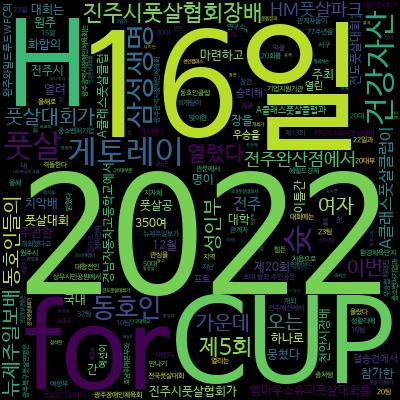

In [124]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('test.jpg',cv2.IMREAD_COLOR)
cv2_imshow(img)

BeautifulSoup 개요

In [ ]:
# !pip install bs4

In [125]:
from bs4 import BeautifulSoup

In [127]:
html_doc = """
<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link2">
    Tillie
   </a>
   ; and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>
"""

In [136]:
bs = BeautifulSoup(html_doc,"html.parser")
# bs.html.head.title
# bs.html.body
for p in bs.html.body.find_all('p'): # p로 되어있는 태그내 내용 모두 찾아달라
  # print(p)
  print(p.attrs)

{'class': ['title']}
{'class': ['story']}
{'class': ['story']}


# 네이버 개발자 센터 -뉴스 (XML 방식)

In [139]:
def search_news_naver2(text,start=1):
  query = urllib.parse.quote(text)
  query_str = f"https://openapi.naver.com/v1/search/news.xml?query={query}&display=10&start={start}&sort=sim"
  request = urllib.request.Request(query_str)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request) #웹 서버에 요청
  if response.getcode() != 200:
    return None
  return response.read()

In [143]:
def search_news_count2(text):
  bdata = search_news_naver2(text)
  if bdata == None:
    return 0
  else:
    dec_data = bdata.decode('utf-8')
    xml_data = BeautifulSoup(dec_data,'xml')
    return int(xml_data.rss.channel.total.get_text())

In [152]:
# 이렇게 작성한 News 객체 json data로 사용
def search_news2(text, last_start = 1000): # last_start 는 1000보다 작거나 같아야함
  tcnt = search_news_count(text) # 전체 뉴스 개수
  rcnt = 0
  start = 1
  re = []
  while(rcnt < tcnt) and (start <= last_start):
    bdata = search_news_naver2(text, start)
    if bdata == None:
      return re
    dec_data = bdata.decode('utf-8')
    xml_data = BeautifulSoup(dec_data, 'xml')
    for news in xml_data.rss.channel.find_all('item'):
      re.append(News2(news))
    start += 1
    rcnt += 100
  return re

In [153]:
# 가져온 데이터 대신 정의된 class로 진행해보기
# News 객체의 속성들과 똑같이 정의해줄 것임
class News2:
  def __init__(self, news):
    self.title = remove_html(news.title.get_text())
    self.description = remove_html(news.description.get_text())
    self.link = news.link.get_text()
  
  def __str__(self):
    return "=== 제목 : " + self.title +" === \n" + self.description

In [ ]:
text = input("질문을 입력하세요 : ")
words = []
for news in search_news2(text, 2):
  words += news.title.split(' ')
  words += news.description.split(' ')
s = pd.Series(words)
s = s[s!=''] # 따라서 공백값을 제외하기 위해 s에서 공백값 제외한값으로 재정의
sc = s.value_counts()
# 이렇게 자를 경우 sc.index[0]의 값은 무조건 공백임
for i in range(50):
  print(sc.index[i], ":", sc.values[i])

# 공공데이터포털 = 여행금지

In [172]:
import requests

url = 'http://apis.data.go.kr/1262000/TravelBanService/getTravelBanList'
params ={'serviceKey' : '서비스키', 'pHAahHGUm0kD2g8i0N/VUYc0kv3iNEi4c+cumcwjfHXgOV8OnSKuYL9D13EGy9sPTUUXH25OFBJoWUPOGlv1KA==' : '10', 'pageNo' : '1', 'countryName' : '가나', 'countryEnName' : 'Ghana', 'isoCode1' : '', 'isoCode2' : '', 'isoCode3' : '', 'isoCode4' : '', 'isoCode5' : '', 'isoCode6' : '', 'isoCode7' : '', 'isoCode8' : '', 'isoCode9' : '', 'isoCode10' : '' }

response = requests.get(url, params=params)
xml_data = BeautifulSoup(response.content.decode('utf-8'))
# print(xml_data.response)
for item in xml_data.response.items.find_all('item'):
  # print(item)
  print(item.countryname.get_text()) #뷰티풀수프는 대문자를 소문자로 바꿔버리므로 유의해야 함


리비아
시리아
소말리아
이라크
아프가니스탄
예멘
필리핀
러시아
벨라루스
우크라이나


# 예습
mse - 평균제곱오차

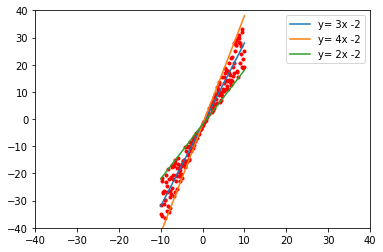

In [189]:
import numpy as np
import matplotlib.pyplot as plt

xs = [x/10 for x in range(-100, 100)]
ys = [(3 + np.random.uniform(-1, 1)) * x  - 2 for x in xs]
plt.plot(xs, ys, 'r.')
plt.plot([-10, 10], [-10 * 3 - 2, 10 * 3 - 2], label = 'y= 3x -2')
plt.plot([-10, 10], [-10 * 4 - 2, 10 * 4 - 2], label = 'y= 4x -2')
plt.plot([-10, 10], [-10 * 2 - 2, 10 * 2 - 2], label = 'y= 2x -2')
plt.xlim(-40, 40)
plt.ylim(-40, 40)
plt.legend()
plt.show()

In [190]:
# 오차 계산 함수 (y = 실제값, yp = 예측값)의 차이의 제곱을 구하는 함수
def error_square(y, yp):
  return (y-yp)**2

In [192]:
yps1 = [3 * x - 2 for x in xs] # 3x -2
yps2 = [4 * x - 2 for x in xs] # 4x -2
yps3 = [2 * x - 2 for x in xs] # 2x -2

In [193]:
# m값이 낮을 수록 직선이 실제 값을 잘 나타냈다고 할 수 있다 (딥러닝 손실 함수)
nys = np.array(ys)
nys1 = np.array(yps1)
m1 = error_square(nys, nys1).mean()
nys2 = np.array(yps2)
m2 = error_square(nys, nys2).mean()
nys3 = np.array(yps3)
m3 = error_square(nys, nys3).mean()
print(m1, m2, m3)

12.079722716069018 47.72250079925223 43.1069446328858
